# PSR tutorial: Getting information from your data

You gathered your data. What is next? Probably, it is time to do some "information harvesting". In this tutorial we will go through the methods that will help you to see what data actually contains. 

### Non-parametric analysis

In [3]:
#some standard libraries
import numpy as np
import math
import matplotlib.pyplot as plt
#library for power-law red-noise generation
import colorednoise as cn
import scipy

Generate the time-series with underlying sine wave with white-noise background. P.S. In pulsar astronomy, this can be RM vs time, DM vs time, Q/U vs frequency, flux vs time, detection/non-detection vs number of observation etc.

Text(0, 0.5, 'Signal')

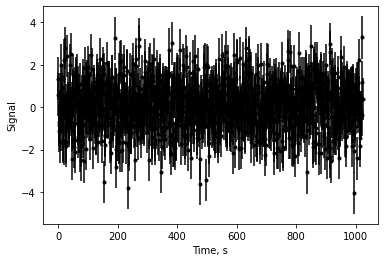

In [4]:
#generate the signal

N=1024 #number of elements in the list
f0=1/10. #frequency of periodic signal
A=1. #amplitude
phi0=np.random.uniform(0,1) # random phase

time_list=np.arange(0, N, 1)
signal=A*np.sin(2*math.pi*f0*time_list+phi0) #generating the signal here
noise=np.random.normal(0.,1, N) #white Gaussian noise
err=[1. for i in range(N)]
sig_obs=signal+noise #combine signal and noise
plt.errorbar(time_list, sig_obs, err, c="black", fmt=".")
plt.xlabel("Time, s")
plt.ylabel("Signal")

### DFT

Perhaps, the simplest and most boadly used way of revealing the periodiciites is the Fourier transform. Since 1807.


DFT creates a beautiful peak from a sine wave function in abs(FFT(signal))**2 vs freq domain.

<img src="pict/Screenshot from 2020-01-23 12-49-15.png">

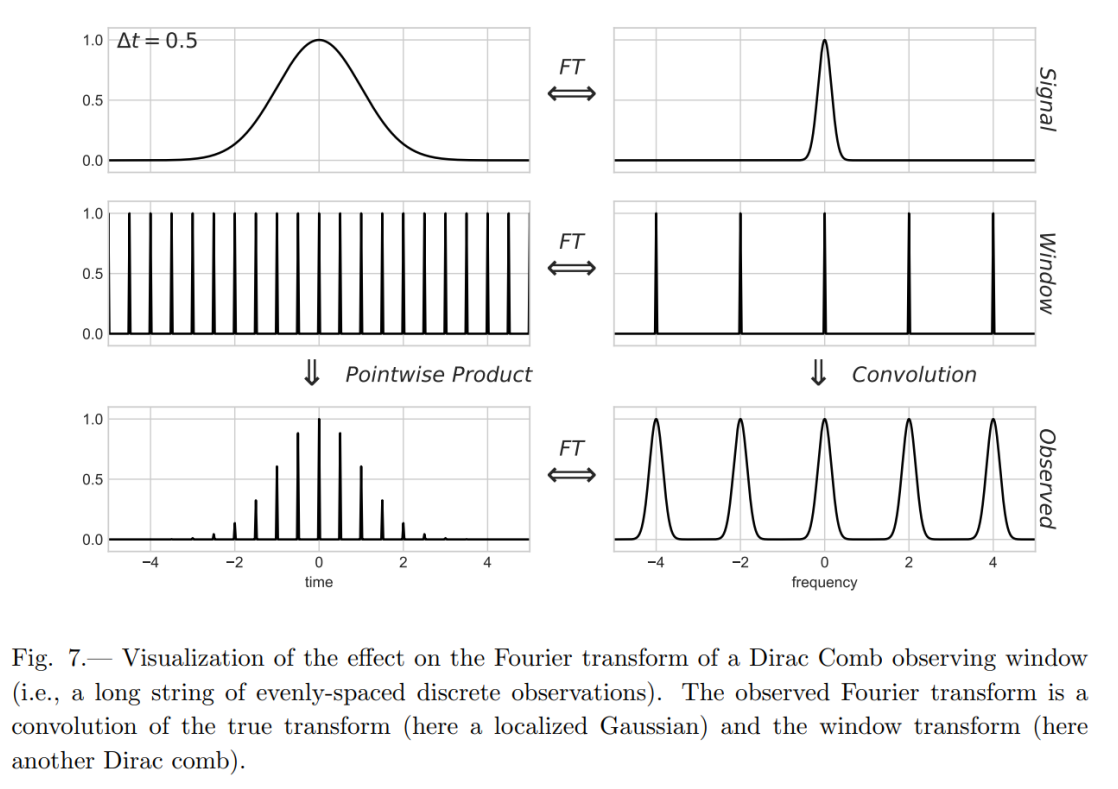

<img src="pict/Screenshot from 2020-01-24 01-19-41.png">

Text(0, 0.5, 'Power')

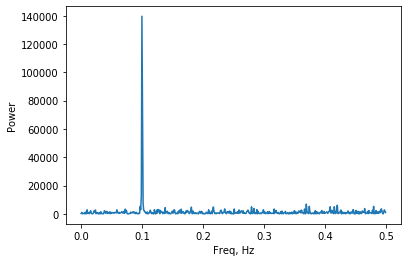

In [12]:
#DFT from numpy
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[0:int(N/2)], power_FT[0:int(N/2)])
plt.xlabel("Freq, Hz")
plt.ylabel("Power")
#plt.xscale("log")
#plt.yscale("log")

A couple of more examples of what we can see in the data, when using only DFT.

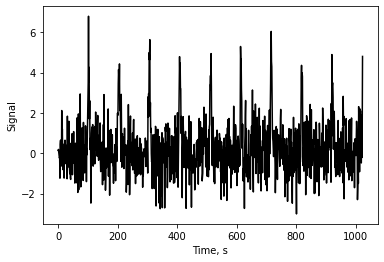

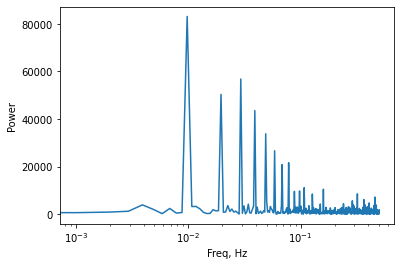

In [5]:
#function, which calculates sequence of Gaussians
def gausspulse(t, num, sigma):
    signal=np.zeros(len(t))
    time_steps=[len(t)/num*(i+1) for i in range(num)]
    for i in range(len(time_steps)):
        signal+=np.exp(-sigma*(t-time_steps[i])**2)
    return signal

#generate the signal
N=1024 #number of elements in the list
f0=1/100. #frequency of periodic signal
A=5. #amplitude
phi0=np.random.uniform(0,1) # random phase

time_list=np.arange(0, N, 1)
signal=A*gausspulse(time_list, int(N*f0), 0.1)
err=[1. for i in range(N)]
noise=np.random.normal(0.,1, N) #white Gaussian noise
sig_obs=signal+noise
plt.plot(time_list, sig_obs, c="black")
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.show()
#DFT
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[0:int(N/2)], power_FT[0:int(N/2)])
plt.xlabel("Freq, Hz")
plt.ylabel("Power")
plt.xscale("log")
#plt.yscale("log")
plt.show()

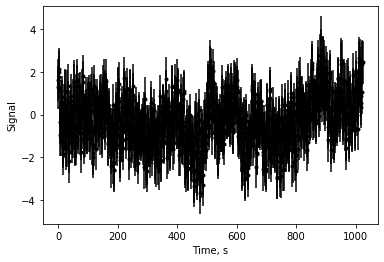

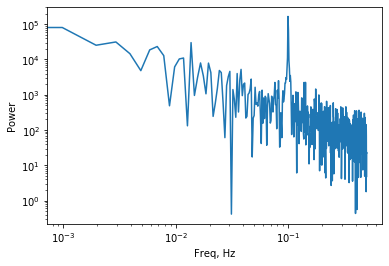

In [14]:
#generate the sine wave signal with the background correlated noise

N=1024 #number of elements in the list
f0=1/10. #frequency of periodic signal
A=1. #amplitude
phi0=np.random.uniform(0,1) # random phase

#slope of the power-law red noise in frequency domain
a=1.2

phi0=np.random.uniform(0,1)
time_list=np.arange(0, N, 1)
signal=A*np.sin(2*math.pi*f0*time_list+phi0)
color_noise=cn.powerlaw_psd_gaussian(a, N) #generating the colored noise here
err=[1. for i in range(N)]
sig_obs=signal+color_noise
plt.errorbar(time_list, sig_obs, err, c="black", fmt=".")
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.show()
#DFT
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[0:int(N/2)], power_FT[0:int(N/2)])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Freq, Hz")
plt.ylabel("Power")
plt.show()

### Lomb-Scargle Periodogramm

"In the real world, particularly in fields like Astronomy where observations are subject to
influences of weather and diurnal, lunar, or seasonal cycles, the sampling rate is generally far from uniform."  

The Lomb-Scargle periodogram is a well-known algorithm to search for periodicities in irregularly sampled data. On nuances of using the Lomb-Scargle periodogram (generalised, significance of a peak, floating means etc, please see https://arxiv.org/pdf/1703.09824.pdf)

<img src="pict/Screenshot from 2020-01-23 14-27-08.png">

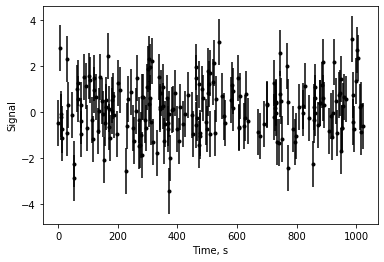

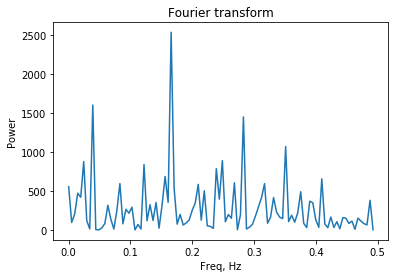

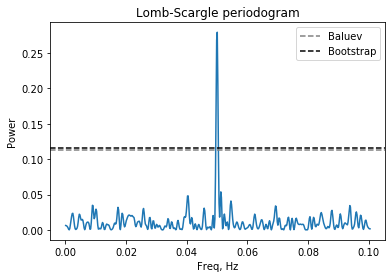

In [15]:
#signal parameters
N=1024 #number of elements in the list
f0=1/20. #frequency of periodic signal
A=1. #amplitude
phi0=np.random.uniform(0,1) # random phase

time_list_masked=time_list
#masking the data
for i in range(int(0.8*N)):
    time_list_masked=np.delete(time_list_masked, np.random.randint(0,len(time_list_masked)))

signal=A*np.sin(2*math.pi*f0*time_list_masked+phi0)
#signal=A*gausspulse(time_list_masked, int(N*f0), 0.1)
noise=np.random.normal(0.,1, len(signal))
err=[1. for i in range(len(signal))]
sig_obs=signal+noise

plt.errorbar(time_list_masked, sig_obs, err, c="black", fmt=".")
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.show()

#DFT
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[0:int(len(time_list_masked)/2)], power_FT[0:int(len(time_list_masked)/2)])
plt.title("Fourier transform")
plt.xlabel("Freq, Hz")
plt.ylabel("Power")
plt.show()

#Lomb-Scargle for unevenly sampled data from astropy
from astropy.stats import LombScargle
#can be easily generalised
ls = LombScargle(time_list_masked, sig_obs, err)
frequency, power = ls.autopower(nyquist_factor=1)


#False-alarm probabilities
probabilities = [0.1, 0.05, 0.01]
levels_bal=ls.false_alarm_level(probabilities, method='baluev')
levels_boot=ls.false_alarm_level(probabilities, method='bootstrap')

plt.plot(frequency, power)
plt.axhline(levels_bal[-1], color='grey', ls="--", label="Baluev")
plt.axhline(levels_boot[-1], color='black', ls="--", label="Bootstrap")
plt.title("Lomb-Scargle periodogram")
plt.xlabel("Freq, Hz")
plt.ylabel("Power")
plt.legend()
plt.show()
#plt.xscale("log")
#plt.yscale("log")

More reading on LS:
1. https://arxiv.org/pdf/1703.09824.pdf
2. Colored noise extnsion: https://arxiv.org/pdf/1006.2473.pdf
3. Non-sine basis functions, Fast Template Periodogram: https://github.com/PrincetonUniversity/FastTemplatePeriodogram
4. Non-sine basis functions: https://ui.adsabs.harvard.edu/abs/2009MNRAS.395.1541B/abstract
https://ui.adsabs.harvard.edu/abs/2013MNRAS.431.1167B/abstract

### Wavelets

In Fourier transform, the signal is decomposed into the sum of sines and cosines. In contrast, within wavelet analysis the signal is decomposed into wavelets, functions which limited in time and frequncy. Therefore, the time resolution is better thn for the Fourier transform. The wavelet transform projects a signal into time vs scale domain. The scale of the wavelet can be associated with the frequency.

<img src="pict/Screenshot from 2020-01-23 15-18-35.png" style="width: 400px;"/>

In [4]:
import pywt #open source wavelet transform software in python
import scaleogram as scg #user friendly tool for pywt
from astroML.fourier import wavelet_PSD #astroML also has wavelet transform library (only Gaussian wavelets)
import scipy.signal 

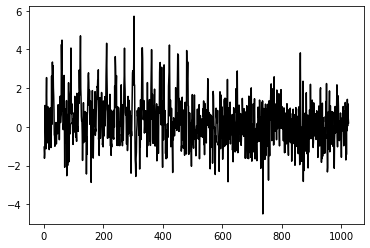

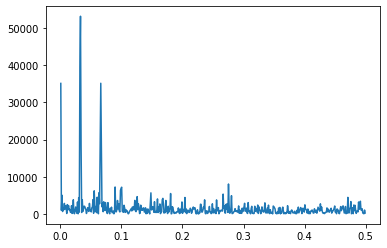

In [5]:
#generate the signal
N=1024 #number of elements in the list
f0=1/30. #frequency of periodic signal
A=1.5 #amplitude
phi0=np.random.uniform(0,1) # random phase

time_list=np.arange(1, N+1, 1)
window=scipy.signal.square(1/200.*time_list, duty=0.4)+1.
signal=A*gausspulse(time_list, int(N*f0), 0.1)
noise=np.random.normal(0.,1.0, N)
err=[1. for i in range(N)]
sig_obs=window*signal+noise #signal is not persistent, e.g. nulling pulses
plt.plot(time_list, sig_obs, c="black")
plt.show()
#DFT
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[1:int(len(time_list)/2)], power_FT[1:int(len(time_list)/2)])
plt.show()

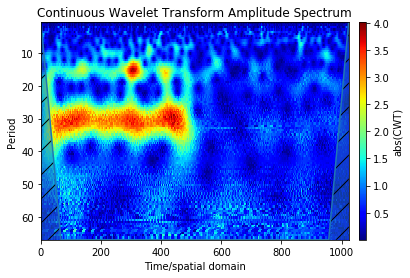

In [6]:
#scg.set_default_wavelet('haar')
#[coef, freq] = pywt.cwt(sig_obs, np.arange(1, N),'haar')
scg.cws(sig_obs, scales=np.arange(1, 100), wavelet='cmor1-1.5')

For more reading: https://www.kaggle.com/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

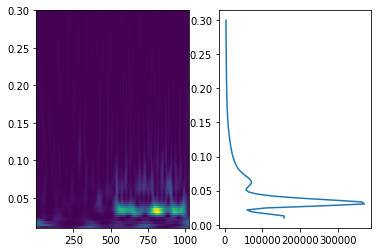

In [19]:
#astroML library also supports wavelets
freq = np.linspace(0.01, 0.3, 100)
wPSD = wavelet_PSD(time_list, sig_obs, freq, Q=1.0)
plt.subplot(121)
plt.imshow(wPSD, origin='lower', aspect='auto',
          extent=[time_list[0], time_list[-1], freq[0], freq[-1]])
plt.subplot(122)
plt.plot(wPSD.sum(axis=1), freq)

### Singular spectrum analysis 

Non-parametric time series analysis.SVD-based decomposition of a time series. The basis functions are not sines and cosines, but the eigentriple of the SVD decomposition.

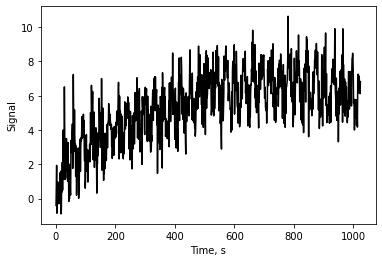

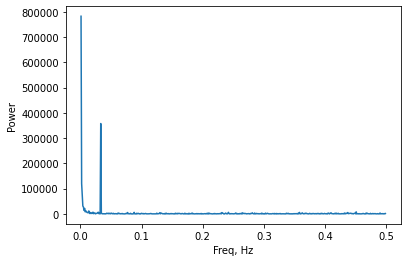

In [24]:
import scipy.signal
#generate the signal
N=1024 #number of elements in the list
f0=1/30. #frequency of periodic signal
A=3. #amplitude
phi0=np.random.uniform(0,1) # random phase
a_t=5. #amplitude of the long-term trend
f_t=1/3000.

time_list=np.arange(1, N+1, 1)
#signal=A*scipy.signal.square(2*math.pi*f0*time_list, duty=0.1)
signal=A*gausspulse(time_list, int(N*f0), 0.01)
noise=np.random.normal(0.,1, N)
trend=a_t*np.sin(2*math.pi*f_t*time_list)
err=[1. for i in range(N)]
sig_obs=signal+trend+noise
plt.plot(time_list, sig_obs, c="black")
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.show()
#DFT
power_FT=abs(np.fft.fft(sig_obs))**2
freq_FT=np.fft.fftfreq(len(sig_obs), 1.)
plt.plot(freq_FT[1:int(len(time_list)/2)], power_FT[1:int(len(time_list)/2)])
plt.xlabel("Freq, Hz")
plt.ylabel("Power")
#plt.xscale("log")
plt.show()

(0.0, 20.0)

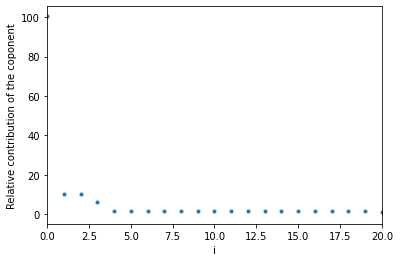

In [25]:
#using ssa iplementation from here https://github.com/dmarienko/chaos
from ssa_core import ssa, inv_ssa
pc, eig, v = ssa(sig_obs, 300)
plt.plot(eig, ".")
plt.ylabel("Relative contribution of the coponent")
plt.xlabel("i")
#plt.yscale("log")
plt.xlim(0, 20)

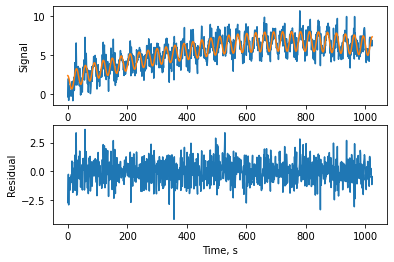

In [26]:
#see how well the signal is reconstructed
num=4
compn=np.arange(0,num,1)
reconstructed = inv_ssa(pc, v, compn)
plt.subplot(211)
plt.plot(sig_obs)
plt.plot(reconstructed)
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.subplot(212)
plt.xlabel("Time, s")
plt.ylabel("Residual")
plt.plot(sig_obs-reconstructed)

KstestResult(statistic=0.02028462971239342, pvalue=0.7854386997349339)


Text(0, 0.5, 'Power')

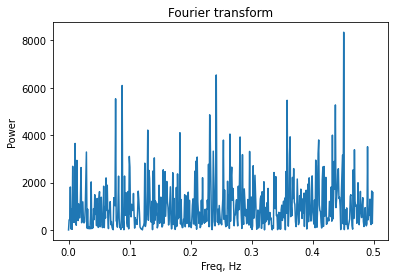

In [27]:
#checking the residuals
from scipy import stats
res=sig_obs-reconstructed
print(stats.kstest(res/np.std(res), 'norm'))
#DFT
res=(res-np.mean(res))/np.std(res)
power_FT=abs(np.fft.fft(res))**2
freq_FT=np.fft.fftfreq(len(res), 1.)
plt.plot(freq_FT[0:int(len(res)/2)], power_FT[0:int(len(res)/2)])
plt.title("Fourier transform")
plt.xlabel("Freq, Hz")
plt.ylabel("Power")

The principal components of the data can be grouped in periodic, trend and noise components. See https://github.com/kieferk/pymssa and https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition for details.

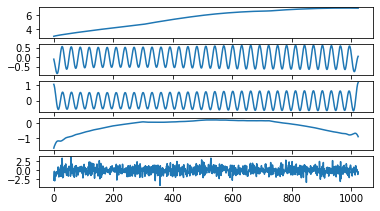

In [28]:
for j in range(num):
    plt.subplot(num+2,1,j+1)
    reconstructed1 = inv_ssa(pc, v, [j])
    plt.plot(reconstructed1)
plt.subplot(num+2,1,j+2)
plt.plot(sig_obs-reconstructed)

## Bayesian blocks

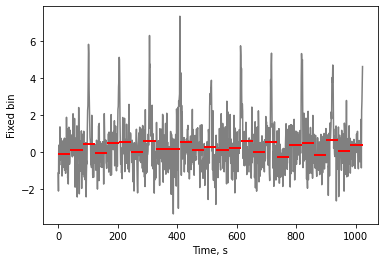

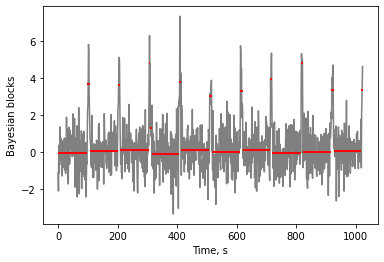

In [31]:
from astropy.stats import bayesian_blocks
from scipy import stats

#generate the signal
N=1024 #number of elements in the list
f0=1/100. #frequency of periodic signal
A=5. #amplitude
phi0=np.random.uniform(0,1) # random phase

time_list=np.arange(0, N, 1)
signal=A*gausspulse(time_list, int(N*f0), 0.1)
err=[1. for i in range(N)]
noise=np.random.normal(0.,1, N) #white Gaussian noise
sig_obs=signal+noise

#Fixed size of the bin
bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(time_list, sig_obs, statistic='mean', bins=25)
plt.plot(time_list, sig_obs, c="grey", zorder=1)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='red', lw=2, zorder=2)
plt.xlabel("Time, s")
plt.ylabel("Fixed bin")
plt.show()

#Bayesian blocks
edges = bayesian_blocks(time_list, sig_obs, err, fitness='measures')
bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(time_list, sig_obs, statistic='mean', bins=edges)
plt.plot(time_list, sig_obs, c="grey", zorder=1)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='red', lw=2, zorder=2)
plt.xlabel("Time, s")
plt.ylabel("Bayesian blocks")
plt.show()

## Discrete correlation function

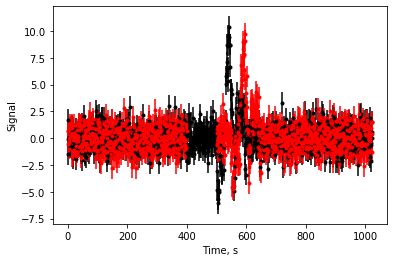


    A simple implementation of the discrete correlation function (DCF)
    Author: Damien Robertson - robertsondamien@gmail.com
    Usage:
      $ python dcf.py -h for help and basic instruction



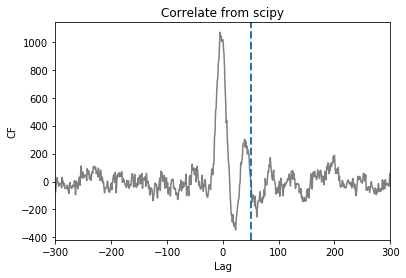

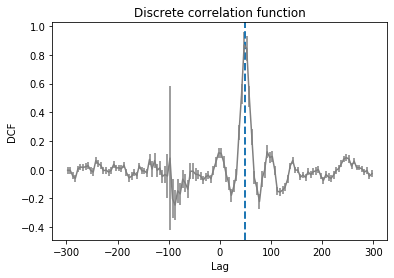

In [26]:
from scipy import signal as sig
import scipy


#generate the signal
N=1024 #number of elements in the list
N_set=100
start=500
shift=50

time_list=np.arange(0, N, 1)
err=[1. for i in range(N)]

#model the signal
color_n=3*cn.powerlaw_psd_gaussian(1.8, N_set)
sig_obs1=np.zeros(N)
sig_obs2=np.zeros(N)

#replace the part of the dataset with the color_n 
sig_obs1[start:N_set+start]=color_n
sig_obs2[start+shift:N_set+start+shift]=color_n

#fill in with Gaussian noise
sig_obs1+=np.random.normal(0.,1, N)
sig_obs2+=np.random.normal(0.,1, N)

#delete random epochs in first time series
list_delete=np.random.randint(0,N, size=100)
sig_obs1=np.delete(sig_obs1, list_delete)
time_list1=np.delete(time_list, list_delete)
err1=np.delete(err, list_delete)

#delete a window in the second time series
window=np.arange(400,500)
sig_obs2=np.delete(sig_obs2, window)
time_list2=np.delete(time_list, window)
err2=np.delete(err, window)
plt.errorbar(time_list1, sig_obs1, err1, c="black", fmt=".")
plt.errorbar(time_list2, sig_obs2, err2, c="red", fmt=".")
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.show()

import dcf

#https://github.com/astronomerdamo/pydcf/blob/master/dcf.py
arr1 = np.transpose(np.vstack((time_list1, sig_obs1, err1)))
arr2 = np.transpose(np.vstack((time_list2, sig_obs2, err2)))
TS1, TS2 = dcf.get_timeseries_ipynb(arr1, arr2, False, 0)

DT = 5.0
lgh=300.
lgl=-300.
num = np.around((lgh - lgl) / float(DT))
T = np.linspace(lgl+(DT/2.0), lgh-(DT/2.0), int(num))

DCF, DCFERR = dcf.sdcf(TS1, TS2, T, DT)
LAGS=scipy.signal.correlation_lags(len(sig_obs2), len(sig_obs1))
CF=scipy.signal.correlate(sig_obs2, sig_obs1)

plt.plot(LAGS, CF, "grey")
plt.axvline(shift, ls="--", lw=2)
plt.title("Correlate from scipy")
plt.xlim(lgl, lgh)
plt.xlabel("Lag")
plt.ylabel("CF")
plt.show()

plt.errorbar(T, DCF, DCFERR, color="grey")
plt.axvline(shift, ls="--", lw=2)
plt.title("Discrete correlation function")
plt.xlabel("Lag")
plt.ylabel("DCF")
plt.show()

### Extras

i)Processing the non-sinusoidal periodicities: https://arxiv.org/pdf/1302.1068.pdf

ii)Discrete correlation function: https://github.com/astronomerdamo/pydcf . Correlation function designed for unevenly sampled datasets.

iii)Non-linear least-square fitting: https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm

iv)Weak periodic signals with unknown light curve shape: http://articles.adsabs.harvard.edu/pdf/1989A%26A...221..180D
https://www.phas.ubc.ca/~oser/p509/Lec_22.pdf

v) Discrete auto-correlation function: https://www.astroml.org/astroML-notebooks/chapter10/astroml_chapter10_Analysis_of_Stochastic_Processes.html

### Modelling your data. Parametric data analysis.

Modelling the data within Bayesian and frequentist inferences is considered. 

Nice intro for beginners: https://emcee.readthedocs.io/en/stable/tutorials/line/

Samplers demonstration: http://mattpitkin.github.io/samplers-demo/

User friendly Bayesian inference with samplers: https://lscsoft.docs.ligo.org/bilby/installation.html

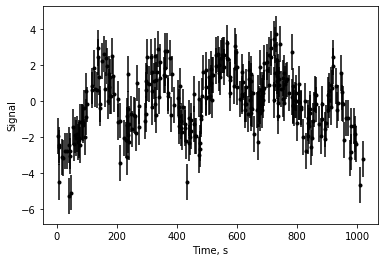

In [27]:
#generate the signal (simple sine wave)
N=1024
f0=10**(-2.3)
A=1.5
phi0=3.4
a=1.8

#data is irregularly sampled
time_list=np.arange(0, N, 1)
time_list_masked=time_list
for i in range(int(0.7*N)):
    time_list_masked=np.delete(time_list_masked, np.random.randint(0,len(time_list_masked)))
signal=A*np.sin(2*math.pi*f0*time_list_masked+phi0)
#uncertainties
err=np.array([1. for i in range(len(time_list_masked))])

#adding noise to the data
color_noise=0.7*cn.powerlaw_psd_gaussian(a, len(time_list_masked))
w_noise=np.random.normal(0.,1, len(time_list_masked))

sig_obs=signal+w_noise+color_noise

plt.errorbar(time_list_masked, sig_obs, err, c="black", fmt=".")
plt.xlabel("Time, s")
plt.ylabel("Signal")
plt.show()

In [28]:
#defining the likelihood and priors for parameters. 
#Used in both Bayesian and frequentist inferences
def log_likelihood(theta, x, y, yerr):
    A1, logf1, phi1 = theta
    model = A1*np.sin(2*math.pi*10**logf1*x+phi1)
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))
def prior(cube, ndim, nparams):
    cube[0]=10.*cube[0]
    cube[1]=5*cube[1]-3.
    cube[2]=np.mod(2*math.pi*cube[2], 2*math.pi)
def loglike_mnest(cube, ndim, nparams):
    theta=cube[0], cube[1], cube[2]
    return log_likelihood(theta, time_list_masked, sig_obs, err)

Frequentist analysis=maximization of the likelihood

In [29]:
from scipy.optimize import differential_evolution
from scipy.optimize import least_squares
import pandas as pd

res = lambda *args: -log_likelihood(*args)

#limited priors
bounds = [(0., 10.), (-3., 3.),(0, 2*math.pi)]

#maximization with stochastic population based method 
least_sq_stoch = differential_evolution(res, bounds, args=(time_list_masked, sig_obs, err), maxiter=3000)
A_ml, logf0_ml, phi_ml = least_sq_stoch.x

#least_sq_sln=least_squares(res, least_sq_stoch.x, args=(time_list_masked, sig_obs, err))
#A_ml, logf0_ml, phi_ml = least_sq_sln.x
#jacm=least_sq_sln.jac
#hess=np.dot(np.transpose(jacm), jacm)
#cov=np.linalg.inv(hess)
#errm=cov*errfunc(least_sq_sln.x, time_list_masked, sig_obs, err)
#print hess

items = [[A, A_ml], [f0, 10**logf0_ml], [phi0, phi_ml]]
df = pd.DataFrame(items, columns=['Injected', 'Found'], dtype=float)
df

,Injected,Found
0,1.500000,1.491849
1,0.005012,0.005104
2,3.400000,3.161759


Bayesian inference = reconstructing your posterior probablity

In [30]:
import pymultinest

parameters = ["A", "logf0", "phi0"]
nparams=len(parameters)
pymultinest.run(loglike_mnest, prior, nparams, n_live_points=400, verbose=True, resume=False, outputfiles_basename="chains/ex_")

  analysing data from chains/ex_.txt


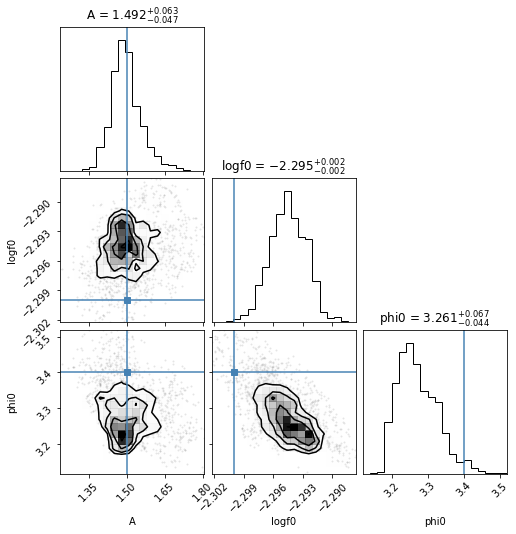

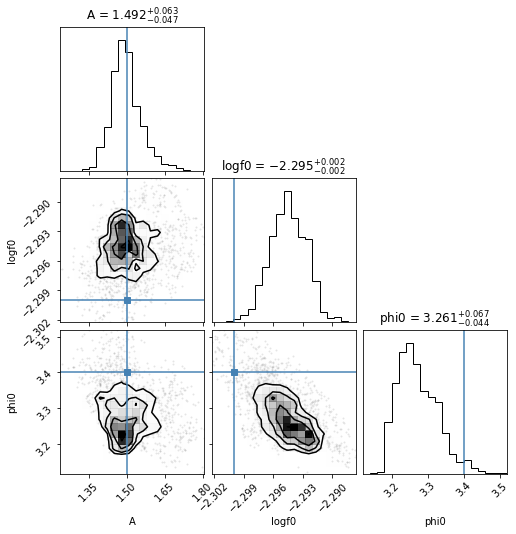

In [31]:
#show the results on corner plot
from pymultinest.analyse import Analyzer
import corner
a = Analyzer(nparams, outputfiles_basename = "chains/ex_")
stats = a.get_stats()

# get the best fit (highest likelihood) point
bestfit_params = a.get_best_fit()

data = a.get_data()[:,2:]
weights = a.get_data()[:,0]

mask = weights > 1e-5

corner.corner(data[mask,:], weights=weights[mask], labels=parameters, truths=[A, np.log10(f0), phi0], show_titles=True, title_fmt='.3f')

Moving on with Bayesian inference. Including Gaussian processes in the analysis to account for the correlated noise of the unknown nature.

In [32]:
#creating a model without kernel
import george
from george.modeling import Model
from george.modeling import Model

class Model(Model):
    parameter_names = ("amp", "logf0", "phi")

    def get_value(self, t):
        return self.amp * np.sin(2*math.pi*10**self.logf0*t.flatten()+self.phi)

model = george.GP(mean=Model(amp=0.1, logf0=0.1, phi=0.1))
model.compute(time_list_masked, err)

def loglike_mnest(cube, ndim, nparams):
    theta=cube[0], cube[1], cube[2]
    model.set_parameter_vector(theta)
    return model.log_likelihood(sig_obs, quiet=True)

In [33]:
#Taking into account the red noise with Gaussian processes
#introducing kernel kernels.Matern32Kernel
from george import kernels
model = george.GP(np.var(sig_obs) * kernels.Matern32Kernel(10.0), mean=Model(amp=0.1, logf0=0.1, phi=0.1))
model.compute(time_list_masked, err)

ndim=len(model.get_parameter_vector())
nparams=len(model.get_parameter_vector())

def prior(cube, ndim, nparams):
    cube[0]=5.*cube[0]
    cube[1]=5*cube[1]-3.
    cube[2]=np.mod(2*math.pi*cube[2], 2*math.pi)
    for i in range(3, ndim):
      cube[i] = 20*cube[i]-10.
def loglike_mnest(cube, ndim, nparams):
    theta=cube[0],cube[1], cube[2], cube[3], cube[4]
    model.set_parameter_vector(theta)
    return model.log_likelihood(sig_obs, quiet=True)

In [34]:
#running the chain
parameters = model.get_parameter_names()
nparams=len(parameters)
pymultinest.run(loglike_mnest, prior, nparams, n_live_points=400, verbose=True, resume=False, outputfiles_basename="chains/ex_")

  analysing data from chains/ex_.txt


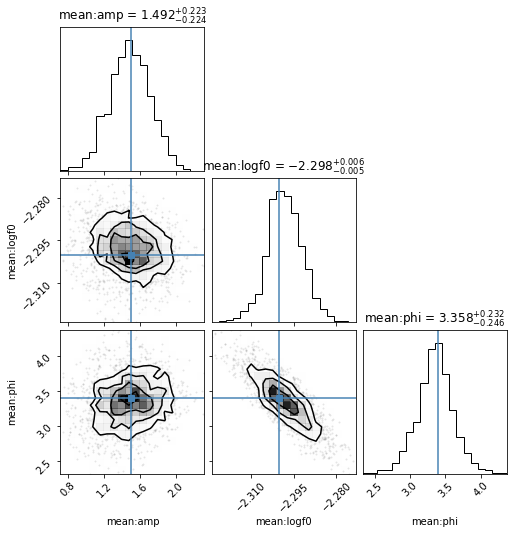

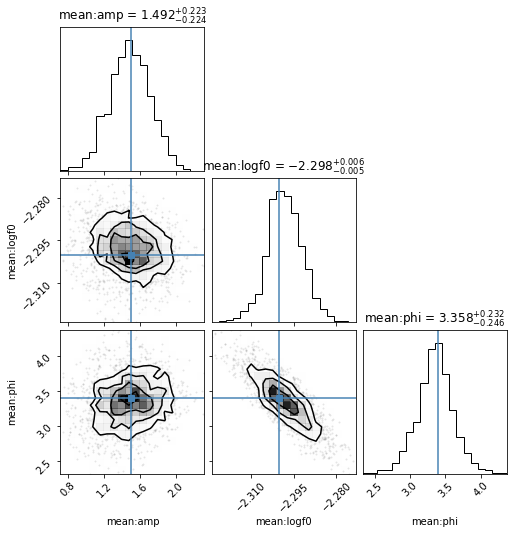

In [35]:
#analysing the output
a = Analyzer(nparams, outputfiles_basename = "chains/ex_")
stats = a.get_stats()

# get the best fit (highest likelihood) point
bestfit_params = a.get_best_fit()
data = a.get_data()[:,2:]
weights = a.get_data()[:,0]

mask = weights > 1e-4

corner.corner(data[mask,0:3], weights=weights[mask], labels=parameters, truths=[A, np.log10(f0), phi0], show_titles=True, title_fmt='.3f')

1. Nested sampler for evidence estimation: https://dynesty.readthedocs.io/en/latest/
2. Multinest for parameter estimation: http://johannesbuchner.github.io/PyMultiNest/index.html#citing-pymultinest
3. Python wrapper for many mcmc samplers: https://lscsoft.docs.ligo.org/bilby/dynesty-guide.html